In [67]:
import os, csv
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras import layers, Input
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import train_test_split
from keras.losses import KLDivergence

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

import csv
import os,random

from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM
from keras.layers.convolutional import Convolution1D
from keras.layers.core import Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import *
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

import datetime
now = datetime.datetime.now

In [2]:
def process(temp):
    min_len = 3000
    for i in range(11):
        j = 0
        while temp[j][i] != '' and j<len(temp)-1:
            j+=1
        min_len = min(min_len, j);
#     print(min_len)
    return temp[:min_len]

In [3]:
types = {'B_ID':8, 'E_ID':16, 'NE_ID':27, 'S_ID':10, 'P_ID':16}
x_val = []
x_id = []
for ids, vals in types.items():
    for i in range(1,vals+1):
        x_id.append(ids + str(i))
        try: 
            with open("../po-cf-ex-1-features/"+ids+str(i)+".csv", 'r') as f:
                temp = list(csv.reader(f, delimiter = ","))
            temp = process(temp)
            temp = np.asarray(temp)
            temp = temp.astype(np.float64)
        except:
            print("Problem in:", ids, i)
            continue
        x_val.append(temp)

# x_val = np.asarray(sequence.pad_sequences(x_val, maxlen=600)).astype(np.float64)
print(len(x_val))
for i in range(len(x_val)):
    print(i,x_val[i].shape)

77
0 (490, 11)
1 (889, 11)
2 (464, 11)
3 (537, 11)
4 (981, 11)
5 (682, 11)
6 (546, 11)
7 (865, 11)
8 (1119, 11)
9 (784, 11)
10 (637, 11)
11 (576, 11)
12 (420, 11)
13 (505, 11)
14 (933, 11)
15 (587, 11)
16 (422, 11)
17 (913, 11)
18 (838, 11)
19 (739, 11)
20 (584, 11)
21 (553, 11)
22 (503, 11)
23 (492, 11)
24 (505, 11)
25 (555, 11)
26 (897, 11)
27 (1079, 11)
28 (905, 11)
29 (1120, 11)
30 (612, 11)
31 (520, 11)
32 (402, 11)
33 (492, 11)
34 (699, 11)
35 (429, 11)
36 (299, 11)
37 (553, 11)
38 (823, 11)
39 (988, 11)
40 (768, 11)
41 (802, 11)
42 (883, 11)
43 (1500, 11)
44 (562, 11)
45 (606, 11)
46 (384, 11)
47 (762, 11)
48 (511, 11)
49 (608, 11)
50 (798, 11)
51 (2472, 11)
52 (684, 11)
53 (273, 11)
54 (691, 11)
55 (1207, 11)
56 (390, 11)
57 (959, 11)
58 (1079, 11)
59 (988, 11)
60 (1144, 11)
61 (581, 11)
62 (487, 11)
63 (1206, 11)
64 (766, 11)
65 (1528, 11)
66 (377, 11)
67 (553, 11)
68 (444, 11)
69 (461, 11)
70 (590, 11)
71 (484, 11)
72 (525, 11)
73 (438, 11)
74 (643, 11)
75 (517, 11)
76 (685, 

In [4]:
po_val = []
cf_val = []
for ids in x_id:
    try:
        df = pd.read_excel("../KiMoRe/"+ids+"/Es1/Label/ClinicalAssessment_"+ids+".xlsx")
    except:
        print("problem in: ", ids)
        continue
    df = np.array(df).reshape((16,))
    po_val.append(df[6])
    cf_val.append(df[11])
po_val = np.asarray(po_val).astype(np.float64)
cf_val = np.asarray(cf_val).astype(np.float64)
ts_val = po_val+cf_val
print("shape of CF: ", cf_val.shape)
print("shape of PO: ", po_val.shape)
print("shape of TS: ", ts_val.shape)
# print(po_val)
for i in range(len(ts_val)):
    if np.isnan(ts_val[i]):
        print(i,x_id[i])
print(ts_val)


/home/yash/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


shape of CF:  (77,)
shape of PO:  (77,)
shape of TS:  (77,)
[41.         38.         28.21008112 33.3397327  44.33333333 45.33333333
 40.33333333 44.33333333 48.33333333 49.33333333 42.66666667 44.66666667
 46.         46.66666667 50.         48.66666667 50.         48.33333333
 50.         50.         46.33333333 44.         50.         47.
 39.66666667 41.         44.33333333 46.33333333 40.66666667 43.66666667
 42.         40.         42.         34.         46.         40.
 50.         50.         45.         47.         47.         38.
 50.         46.         46.         43.         41.         50.
 47.         49.         49.         27.         34.         44.
 26.         32.89508774 38.41075339 26.66666667 36.         26.33333333
 33.66666667 48.         27.         50.         14.         33.
 50.         22.         32.         40.         34.3081805  14.66666667
 35.66666667 36.66666667 36.         27.66666667 37.        ]


In [5]:
for i in range(77):
    if x_val[i].shape[0]==562:
        print(i)

44


In [6]:
length = len(ts_val)

In [7]:
def jumble_up(val):
    return np.random.permutation(val)


In [8]:
indices = np.arange(len(ts_val))
indices = jumble_up(indices)
temp_x = x_val
x_val = []
temp_ts = ts_val
ts_val = []
for i in range(length):
    print(i)
    x_val.append(temp_x[indices[i]])
    ts_val.append(temp_ts[indices[i]])
    print(x_val[i].shape)

0
(612, 11)
1
(553, 11)
2
(883, 11)
3
(429, 11)
4
(637, 11)
5
(553, 11)
6
(682, 11)
7
(555, 11)
8
(905, 11)
9
(1079, 11)
10
(490, 11)
11
(959, 11)
12
(517, 11)
13
(606, 11)
14
(390, 11)
15
(1207, 11)
16
(422, 11)
17
(988, 11)
18
(1206, 11)
19
(505, 11)
20
(273, 11)
21
(562, 11)
22
(299, 11)
23
(1120, 11)
24
(1144, 11)
25
(461, 11)
26
(587, 11)
27
(402, 11)
28
(553, 11)
29
(699, 11)
30
(438, 11)
31
(933, 11)
32
(684, 11)
33
(823, 11)
34
(487, 11)
35
(897, 11)
36
(838, 11)
37
(608, 11)
38
(1500, 11)
39
(766, 11)
40
(420, 11)
41
(492, 11)
42
(520, 11)
43
(981, 11)
44
(484, 11)
45
(2472, 11)
46
(865, 11)
47
(511, 11)
48
(1119, 11)
49
(584, 11)
50
(537, 11)
51
(1528, 11)
52
(762, 11)
53
(913, 11)
54
(384, 11)
55
(739, 11)
56
(444, 11)
57
(377, 11)
58
(576, 11)
59
(768, 11)
60
(802, 11)
61
(464, 11)
62
(798, 11)
63
(503, 11)
64
(590, 11)
65
(1079, 11)
66
(889, 11)
67
(505, 11)
68
(685, 11)
69
(691, 11)
70
(546, 11)
71
(784, 11)
72
(525, 11)
73
(643, 11)
74
(988, 11)
75
(581, 11)
76
(492, 11)

In [9]:
for i in range(length):
    if x_val[i].shape[0]==562:
        print(i)

21


In [10]:
max_x_val = -1
max_ts_val = -1
for i in range(len(ts_val)):
    max_x_val = max(max_x_val, np.max(np.abs(x_val[i])))
    max_ts_val = max(max_ts_val, np.max(np.abs(ts_val[i])))
x_val = x_val/max_x_val
ts_val = ts_val/max_ts_val
x_train, x_test, y_train, y_test = train_test_split(x_val,ts_val, test_size=0.3)
print(x_test.shape)
print(x_train.shape)

(24,)
(53,)


<ipython-input-10-7e8cac94481f>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_val = x_val/max_x_val


In [11]:
# timesteps = 600 
nr = 77   
n_dim = 11  
dropout_rate = 0.1

In [12]:
def train_generator(lim):
    n=0
    while n<lim:
        i = n%53
        xt = []
        yt = []
        xt.append(x_train[i])
        yt.append(y_train[i])
        xt = np.array(xt).astype('float32')
        yt = np.array(yt).astype('float32')
        yield xt,yt
        n+=1
        

In [13]:
def val_generator(lim):
    n=0
    while n<lim:
        i = n%24
        xt = []
        yt = []
        xt.append(x_test[i])
        yt.append(y_test[i])
        xt = np.array(xt).astype('float32')
        yt = np.array(yt).astype('float32')
        yield xt,yt
        n+=1

In [14]:
for i in range(53):
    print(x_train[i].shape)
print("---------")
for i in range(24):
    print(x_test[i].shape)

(865, 11)
(587, 11)
(576, 11)
(883, 11)
(699, 11)
(1120, 11)
(444, 11)
(988, 11)
(581, 11)
(438, 11)
(377, 11)
(546, 11)
(762, 11)
(492, 11)
(299, 11)
(520, 11)
(889, 11)
(933, 11)
(484, 11)
(584, 11)
(384, 11)
(637, 11)
(1079, 11)
(553, 11)
(420, 11)
(823, 11)
(988, 11)
(553, 11)
(959, 11)
(1079, 11)
(555, 11)
(768, 11)
(612, 11)
(1207, 11)
(2472, 11)
(517, 11)
(492, 11)
(429, 11)
(503, 11)
(402, 11)
(784, 11)
(643, 11)
(505, 11)
(490, 11)
(682, 11)
(1119, 11)
(553, 11)
(422, 11)
(590, 11)
(1528, 11)
(1500, 11)
(273, 11)
(464, 11)
---------
(691, 11)
(505, 11)
(525, 11)
(461, 11)
(766, 11)
(562, 11)
(537, 11)
(905, 11)
(608, 11)
(684, 11)
(606, 11)
(487, 11)
(838, 11)
(798, 11)
(913, 11)
(897, 11)
(981, 11)
(1144, 11)
(390, 11)
(739, 11)
(1206, 11)
(511, 11)
(802, 11)
(685, 11)


In [72]:
def Network():
    model = Sequential()

    model.add(Bidirectional(LSTM(128, recurrent_dropout = 0.2, return_sequences = True), input_shape = (None,n_dim)))
    model.add(Dropout(0.3))

    model.add(Bidirectional(LSTM(64, recurrent_dropout = 0.1,return_sequences = True)))
    model.add(Dropout(0.2))
    model.add(Convolution1D(16, 1))

    model.add(Convolution1D(8, 1))
    
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(1,activation='sigmoid'))

    print(model.summary())
    model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer=Adam())
    # Early stopping if the validaton Loss does not decrease for 100 epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience = 100)

    t = now()
    history = model.fit(train_generator(3000),steps_per_epoch=10, epochs=100, verbose=1,
                        validation_data=val_generator(3000),validation_steps=2,callbacks = [early_stopping])
    print('training time')
    print(now() - t)
    
    # Plot the results
    plt.figure(1)
    plt.subplot(221)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.subplot(222)
    plt.plot(history.history['val_loss'])
    plt.title('Validation Loss')
    plt.tight_layout()
    plt.show()
    
    # Plot the prediction of the CNN model for the training and validation sets
    pred_test = []
    for i in range(24):
        xt = []
        xt.append(x_test[i])
        xt = np.array(xt).astype('float32')        
        prediction = model.predict(xt)
        pred_test.append(prediction)
    pred_test = np.array(pred_test).astype('float32') 
    pred_test = pred_test.reshape(24)
    pred_train = []
    for i in range(53):
        xt = []
        xt.append(x_train[i])
        xt = np.array(xt).astype('float32')
        pred_train.append(model.predict(xt))
    pred_train = np.array(pred_train).astype('float32') 
    print(pred_train.shape)
    
    
    pred_train = pred_train.reshape(53)
    plt.figure(figsize = (8,8))
    plt.subplot(2,1,1)
    plt.plot(pred_train,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_train,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.ylim([-0.1,1.1])
    plt.title('Training Set',fontsize=18)
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.subplot(2,1,2)
    plt.plot(pred_test,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_test,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.title('Testing Set',fontsize=18)
    plt.ylim([-0.1,1.1])
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Score',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) 
    plt.tight_layout()
    plt.show()
    
    
    test_dev = abs(np.squeeze(pred_test)-y_test)
    mean_abs_dev = np.mean(test_dev)
    rms_dev = sqrt(mean_squared_error(pred_test, y_test))
    print('Mean absolute deviation:', mean_abs_dev)
    print('RMS deviation:', rms_dev)
    
    return mean_abs_dev, rms_dev

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_59 (Bidirectio (None, None, 256)         143360    
_________________________________________________________________
dropout_58 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
bidirectional_60 (Bidirectio (None, None, 128)         164352    
_________________________________________________________________
dropout_59 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
conv1d_60 (Conv1D)           (None, None, 16)          2064      
_________________________________________________________________
conv1d_61 (Conv1D)           (None, None, 8)           136       
_________________________________________________________________
bidirectional_61 (Bidirectio (None, 64)              

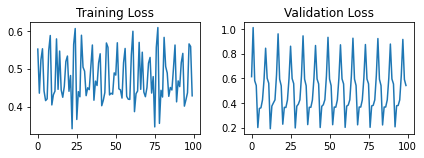

(53, 1, 1)


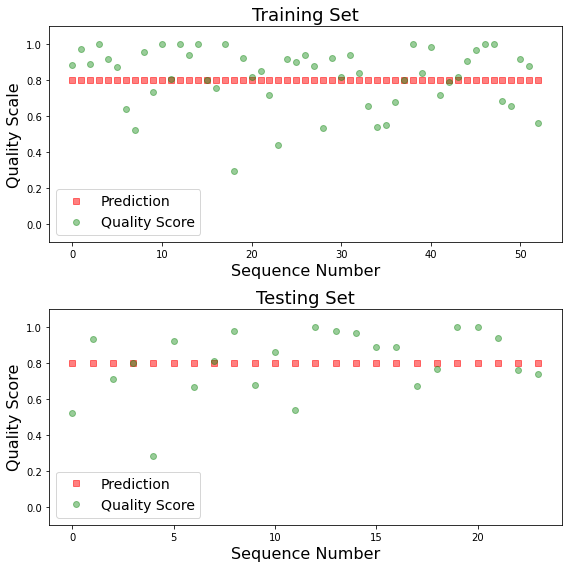

Mean absolute deviation: 0.14267719361837666
RMS deviation: 0.1781002389139188


In [73]:
Mean_abs_dev, RMS_dev  = Network()

In [ ]:
print(3e-4)